<a href="https://colab.research.google.com/github/Emmanuel461/PML_2023_2024/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

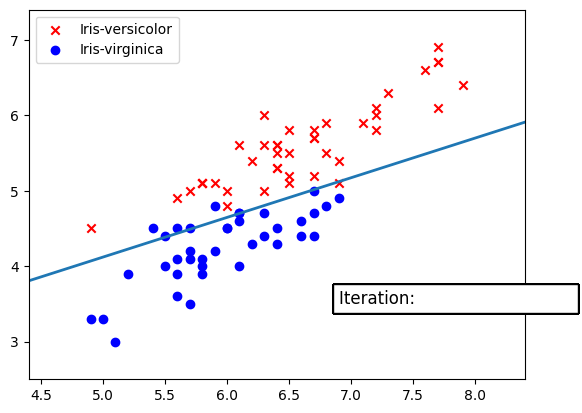

In [6]:
from matplotlib.animation import FuncAnimation
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split

class Perceptron():
    #initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, eta=0.1, n_iter=50, batch_size=10, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        for i in range(0, X.shape[0], self.batch_size):
            X_batch = X[i:i+self.batch_size]
            y_batch = y[i:i+self.batch_size]
            errors, Loss = self.loss(X_batch,y_batch)
            self.Loss = Loss
            #print(self.Loss)
            #print(errors)
            self.w_[1:] += self.eta * X_batch.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def loss(self, X, y):
        errors = y - self.predict(X)
        Loss = ((errors ** 2).sum()) ** 0.5
        return errors,Loss

    def shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def init_plot(self):
        self.line.set_data([],[])
        return self.line

    def animate(self, iteration_number, X, y):
        # Shuffling the data
        X, y = self.shuffle(X, y)
        # Fit
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        #loss = self.loss(X, y)
        if iteration_number%2==0:
            self.ax.text(min(X[:,0])+2, min(X[:,1])+0.5, f'Iteration: {iteration_number}, Loss: {round(self.Loss,4)}', fontsize=12)  # Update iteration number
        else:
            self.ax.text(min(X[:,0])+2, min(X[:,1])+0.5, 'Iteration:'+' '*30, fontsize=12, bbox=dict(facecolor='white', alpha=1))
        return self.line,
        #self.ax.text(min(X[:,0])+2, min(X[:,1])+0.5, f'Iteration: {iteration_number}, Loss: {self.Loss}', fontsize=12)

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0]/self.w_[2])/(self.w_[0]/self.w_[1])
        intercept = -self.w_[0]/self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            #y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope*i) + intercept)
        return x, y

    def animated_fit(self, X, y):
      self.Loss= 0
      self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] # Inicialización de pesos aleatorios

      # Se define la figura y ejes
      self.fig, self.ax = plt.subplots()

      # Se establecen los límites de los ejes
      self.ax.set_xlim(min(X[:,0])-0.5, max(X[:,0])+0.5)
      self.ax.set_ylim(min(X[:,1])-0.5, max(X[:,1])+0.5)

      # Se trazan los puntos de entrenamiento
      self.scatter_spA = self.ax.scatter(X[y == -1, 0], X[y == -1, 1], c='r', marker = 'x', label=self.nameA)
      self.scatter_spB = self.ax.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='o', label=self.nameB)

      # Se agregan las etiquetas
      self.ax.legend()

      # Se inicializa la línea de separación
      self.line, = self.ax.plot([], [], lw=2)

      # Se crea la animación
      anim = FuncAnimation(self.fig, partial(self.animate, X=X, y=y), init_func=self.init_plot, frames=self.n_iter, interval=200)
      anim.save('learning_process.gif')


#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1= {'name':"Iris-setosa",'s':0,'end':50} #0:50 # small size
SPECIES_2= {'name':"Iris-versicolor",'s':50,'end':100} # 50:100
SPECIES_3= {'name':"Iris-virginica",'s':100,'end':150} # 100:150
spA,spB=SPECIES_2,SPECIES_3



#preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1) # discrete response


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of a Perceptron object
ppn = Perceptron(eta=0.0001, n_iter=150, batch_size=25, nameA=spA['name'], nameB=spB['name'])
ppn.animated_fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt # to plot


y_pred = ppn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Define class labels
classes = ['Zero', 'One']
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import classification_report
import numpy as np
# Compute confusion matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.80      1.00      0.89         8
           1       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

